### 預測油價趨勢及分析油價與電價關係

資料來源:整理自 

1.台灣中油股份有限公司-油品行銷事業部 -油品價目-汽、柴、燃油歷史價格
  
網址 https://web.cpc.com.tw/division/mb/oil-more4.aspx

2. 政府資料開放平台 - 資料集 - 用電統計資料 https://data.gov.tw/dataset/6064

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  #用於回歸
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

In [213]:
oil_price = pd.read_csv('data/oil_price.csv')  # oil price 
power_price = pd.read_csv('data/power_price.csv')  # power price 

In [214]:
oil_price.head()  
#資料為每周一筆 
#不一定每周都有調整  
#越接近現在幾乎每周一筆

,adjust date,92 unleaded gasoline,95 unleaded gasoline,98 unleaded gasoline
0,1999/7/14,16.0,17.0,18.0
1,1999/8/11,16.4,17.4,18.4
2,1999/9/1,16.4,17.4,18.4
3,1999/11/10,16.8,17.8,18.8
4,1999/12/8,17.2,18.2,19.2


In [215]:
oil_price.shape

(566, 4)

Text(0, 0.5, 'oil price (NT$)')

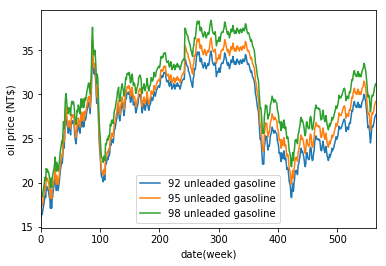

In [216]:
oil_price.plot()
plt.xlabel('date(week)')
plt.ylabel('oil price (NT$)')   #由圖可知三種無鉛汽油漲跌趨勢幾乎一致

In [217]:
# np.sum(np.sum(pd.isnull(oil_price)))   # 檢查 NAN 數量  # 0 
np.any(oil_price.isnull())    # 檢查 是否有 NAN 

False

三種無鉛汽油漲跌類似

因此取95無鉛為代表做線性回歸

In [218]:
regr = LinearRegression()

In [219]:
gas95 = oil_price['95 unleaded gasoline']
y = gas95.copy()  #預測目標
x = np.array(range(1,len(gas95)+1))  #以數字序列為 x
X = x.reshape(len(x),1)

In [220]:
regr.fit(X, y)
result = regr.predict(X)
print("linear MSE  = {}".format(mean_squared_error(y,result)))    #計算MSE

linear MSE  = 20.654779446409435


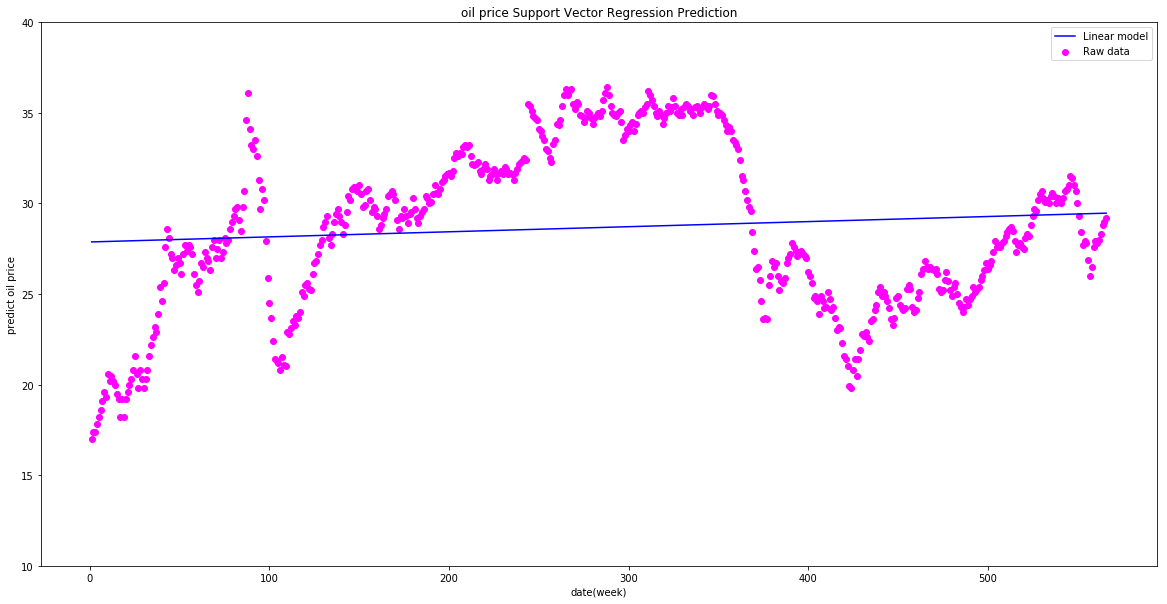

In [221]:
plt.figure(figsize=(20,10))

plt.scatter(x,y, color='magenta', label='Raw data')
plt.plot(x, result, color='blue',  label='Linear model')

plt.ylim(10,40)
plt.xlabel('date(week)')
plt.ylabel('predict oil price')
plt.title('oil price Support Vector Regression Prediction')
plt.legend()
plt.show()

油價有慢慢上升的趨勢

那是否會有油電雙漲的情形呢? (油漲時電也漲)

(先假裝忘記有通膨)

In [222]:
power_price.head()
#資料為一年一筆

,year,price
0,1951,0.1584
1,1952,0.1551
2,1953,0.1908
3,1954,0.1902
4,1955,0.2533


In [223]:
np.any(power_price.isnull()) # 檢查 是否有 NAN 

False

取出共同都有的部分 1999-2018年

In [224]:
power_new = power_price[power_price['year']>1998]
ye = power_new["year"]

In [225]:
oil_price2 = oil_price.copy()  #新增copy以不改變原本變數
year = []
for i in range(0,len(oil_price2['adjust date'])):
    year.append(int(oil_price2['adjust date'][i][0:4])) 

In [226]:
oil_price2['year'] = year

In [227]:
oil_price2.head()    #取出年分

,adjust date,92 unleaded gasoline,95 unleaded gasoline,98 unleaded gasoline,year
0,1999/7/14,16.0,17.0,18.0,1999
1,1999/8/11,16.4,17.4,18.4,1999
2,1999/9/1,16.4,17.4,18.4,1999
3,1999/11/10,16.8,17.8,18.8,1999
4,1999/12/8,17.2,18.2,19.2,1999


In [228]:
gas95_mean = []
for i in ye:
    gas95_mean.append(round(np.mean(oil_price2['95 unleaded gasoline'][oil_price2['year'] == i]),4))

In [230]:
power_new['gas95'] = gas95_mean

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [231]:
power_new.head()

,year,price,gas95
48,1999,2.1071,17.5600
49,2000,2.1133,19.7625
50,2001,2.1221,19.2250
51,2002,2.0945,19.4167
52,2003,2.0682,20.5000


In [232]:
power_price = power_new['price']

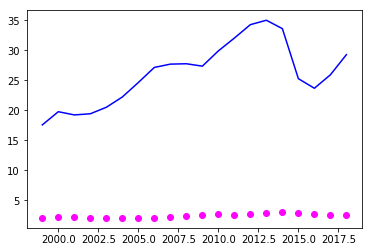

In [233]:
plt.scatter(ye,power_price, color='magenta', label='power price')
plt.plot(ye, gas95_mean, color='blue',  label='mean 95 unleaded gasoline price')

In [234]:
regr2 = LinearRegression()

In [235]:
X2 = np.array(gas95_mean).reshape(len(gas95_mean),1)
y2 = list(power_price)

In [238]:
regr2.fit(X2, y2)
result2 = regr2.predict(X2)

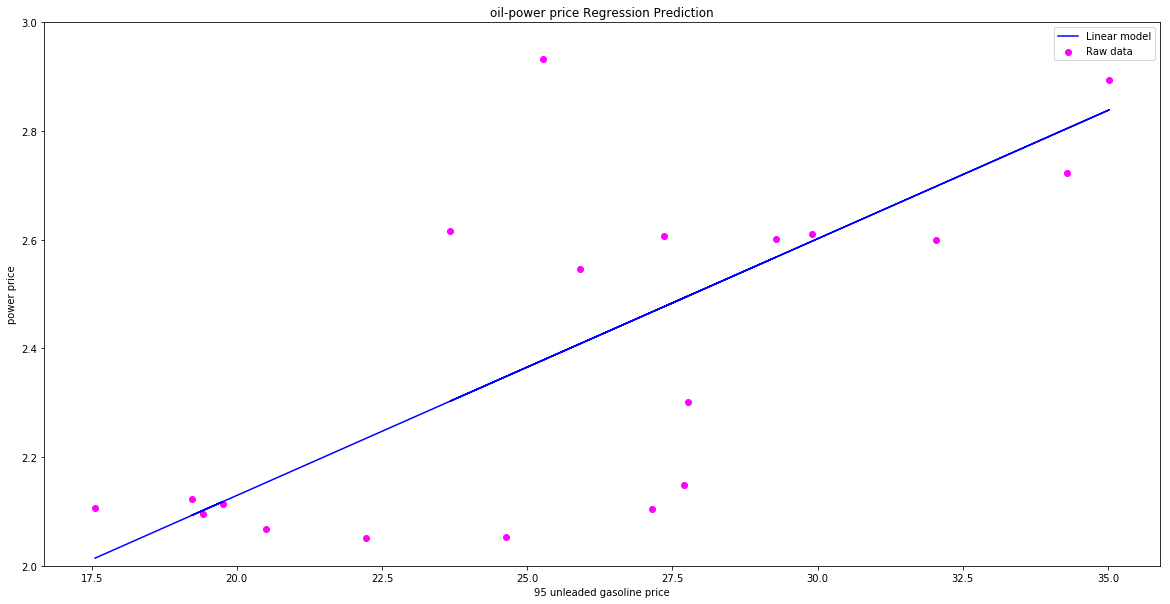

In [239]:
plt.figure(figsize=(20,10))

plt.scatter(X2,y2, color='magenta', label='Raw data')
plt.plot(X2, result2, color='blue',  label='Linear model')

plt.ylim(2,3)
plt.xlabel('95 unleaded gasoline price')
plt.ylabel('power price')
plt.title('oil-power price Regression Prediction')
plt.legend()
plt.show()

結論:
油價有些微逐年漲價趨勢，
而如果油有漲價，
的確有電價跟著漲的情形。